Gerar uma nuvem de palavras (word cloud) no Python é super tranquilo com a biblioteca wordcloud. Aqui vai um exemplo completo e simples que você pode usar direto no Google Colab ou no seu ambiente local:

 Passo 1: Instalar as bibliotecas necessárias

In [1]:
#Se estiver no Google Colab, instale com:
!pip install wordcloud matplotlib


Passo 2: Criar e exibir uma nuvem de palavras


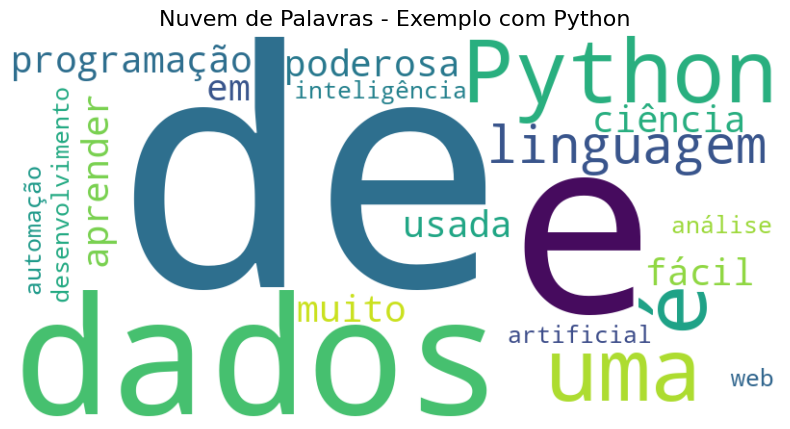

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto de exemplo (pode ser carregado de um arquivo também)
texto = """
Python é uma linguagem de programação poderosa, fácil de aprender e muito usada em ciência de dados, inteligência artificial, análise de dados, desenvolvimento web e automação.
"""

# Criar a nuvem de palavras
nuvem = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(texto)

# Exibir a nuvem
plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Exemplo com Python", fontsize=16)
plt.show()


Dica: Gerar a nuvem a partir de um arquivo .txt

In [10]:
# Carregar texto de um arquivo
with open("seuarquivo.txt", "r", encoding="utf-8") as f:
    texto = f.read()

# Gerar a nuvem normalmente
nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto)



Gerando lista de palavras para serem ignoradas:

Removendo palavras com stopwords (palavras comuns tipo “de”, “o”, “e”)?

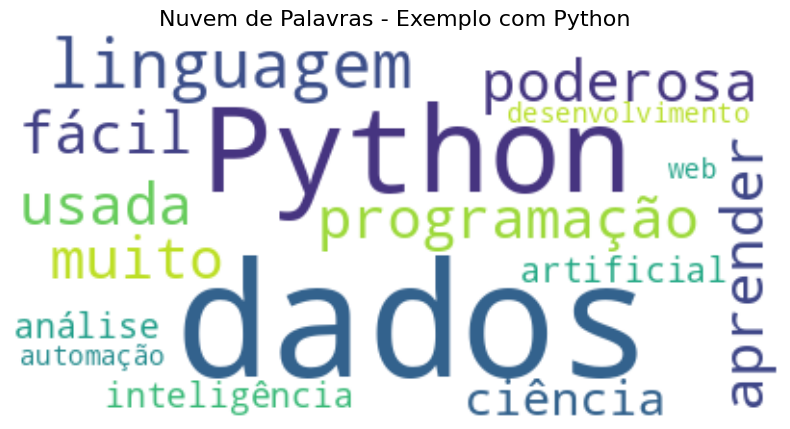

In [9]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["de", "e", "é", "uma", "em"])  # Pode adicionar palavras específicas

nuvem = WordCloud(stopwords=stopwords, background_color='white').generate(texto)

# Exibir a nuvem
plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Exemplo com Python", fontsize=16)
plt.show()



In [12]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords_pt = set(stopwords.words('portuguese'))
print(sorted(stopwords_pt)[:50])  # primeiras 20

['a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estar', 'estas', 'estava', 'estavam', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


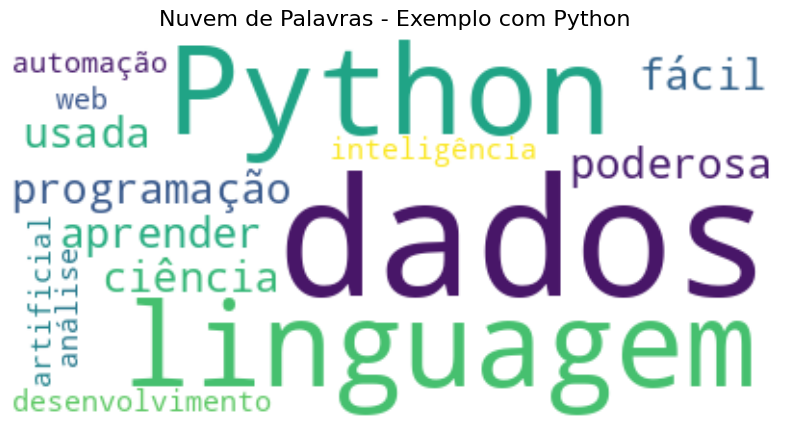

In [14]:
# Texto de exemplo (pode ser carregado de um arquivo também)
texto = """
Python é uma linguagem de programação poderosa, fácil de aprender e muito usada em ciência de dados, inteligência artificial, análise de dados, desenvolvimento web e automação.
"""
nuvem = WordCloud(stopwords=stopwords_pt, background_color='white').generate(texto)

# Exibir a nuvem
plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Exemplo com Python", fontsize=16)
plt.show()

Lê o conteúdo da página https://g1.globo.com/.

Extrai os textos principais da página.

Gera um mapa de palavras (word cloud) com os termos mais frequentes, excluindo stopwords em português.


In [20]:
# Instalação de bibliotecas necessárias
!pip install requests beautifulsoup4 wordcloud unidecode nltk --quiet

# Imports
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from unidecode import unidecode
import nltk
from nltk.corpus import stopwords


In [21]:
# Baixando as stopwords em português
nltk.download('stopwords')
stopwords_pt = set(stopwords.words('portuguese'))

#print(sorted(stopwords_pt)[:20])  # primeiras 20

# Função para limpar o texto
def limpar_texto(texto):
    texto = unidecode(texto.lower())  # remover acentos e caixa alta
    palavras = texto.split()
    palavras = [p for p in palavras if p.isalpha() and p not in stopwords_pt and len(p) > 2]
    return " ".join(palavras)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


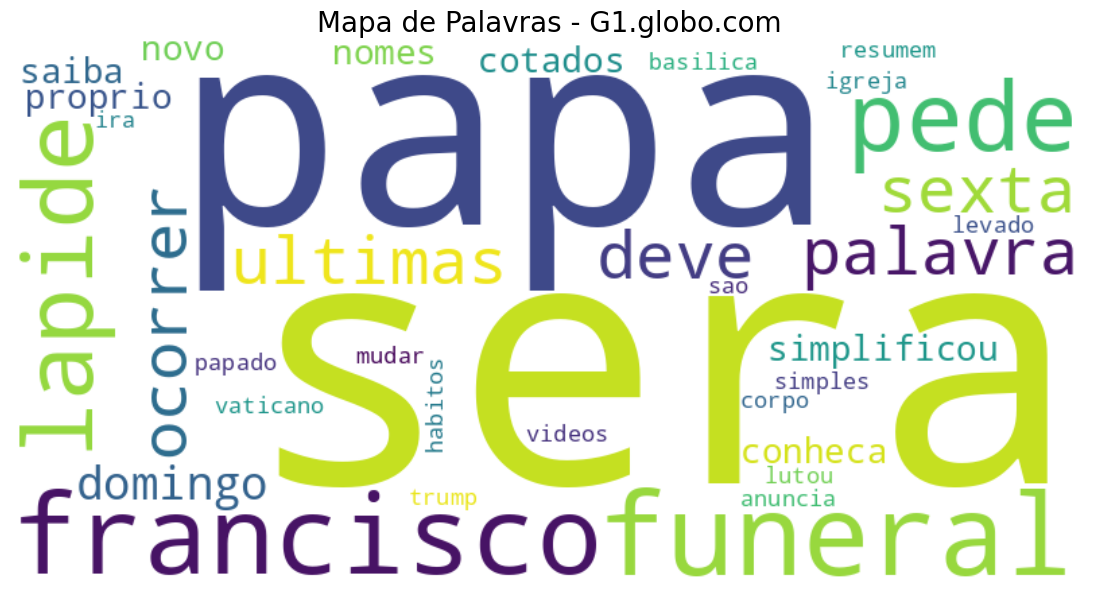

In [22]:

# Requisição à página do G1
url = "https://g1.globo.com/"
resposta = requests.get(url)
soup = BeautifulSoup(resposta.content, 'html.parser')

# Extração dos textos visíveis das manchetes, links e parágrafos
textos = []
total = 0
max=20
for tag in soup.find_all(['h1', 'h2', 'h3', 'p', 'a']):
    if total <= max:
      if tag.text:
          textos.append(tag.get_text(strip=True))
      total += 1
    else:
      break

# Concatenando e limpando os textos
texto_concatenado = ' '.join(textos)
texto_limpo = limpar_texto(texto_concatenado)

# Gerar o mapa de palavras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(texto_limpo)

# Exibir o mapa de palavras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Mapa de Palavras - G1.globo.com", fontsize=20)
plt.show()

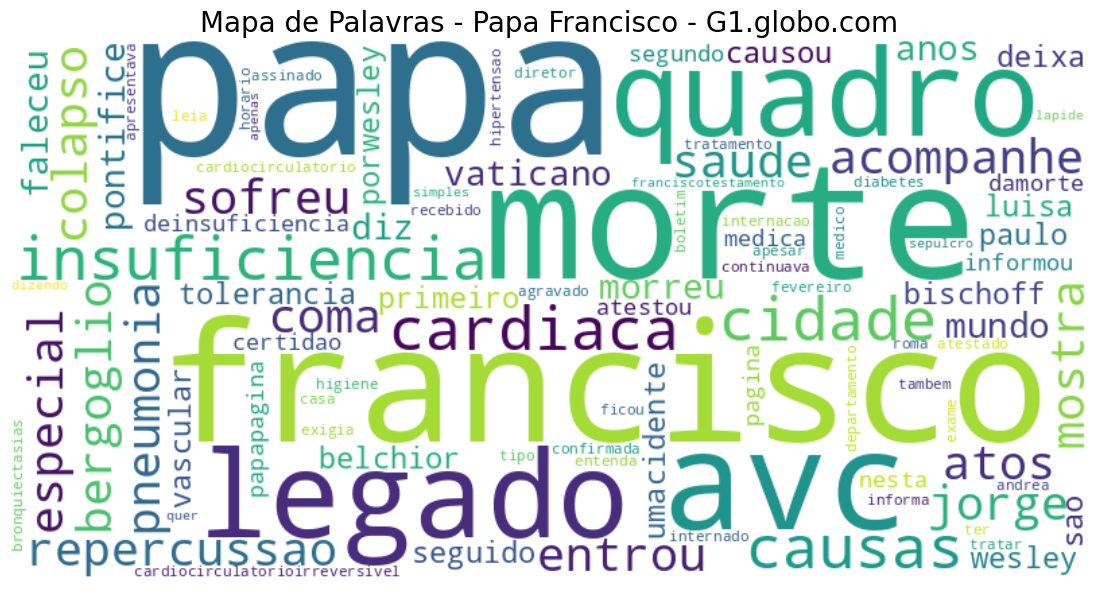

In [23]:
# Requisição à página do G1
url = "https://g1.globo.com/mundo/noticia/2025/04/21/causa-da-morte-do-papa-diz-vaticano.ghtml"
resposta = requests.get(url)
soup = BeautifulSoup(resposta.content, 'html.parser')

# Extração dos textos visíveis das manchetes, links e parágrafos
textos = []
total = 0
max=20
for tag in soup.find_all(['h1', 'h2', 'h3', 'p', 'a']):
    if total <= max:
      if tag.text:
          textos.append(tag.get_text(strip=True))
      total += 1
    else:
      break

# Concatenando e limpando os textos
texto_concatenado = ' '.join(textos)
texto_limpo = limpar_texto(texto_concatenado)

# Gerar o mapa de palavras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(texto_limpo)

# Exibir o mapa de palavras
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Mapa de Palavras - Papa Francisco - G1.globo.com", fontsize=20)
plt.show()